[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1IjhCHulWNIYv72U1vqbtOlFerKoeyT_6)

# Exploring EchoRegions Regions2D Object

This notebook shows some of the functionalities of the `echoregions` `Region2D` object.

In [2]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xarray as xr
import glob
from pathlib import Path
import sys

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
# install gdown to read data from Google Drive
!pip install gdown

In [5]:
# install echoregions package (I should fix to the current version in the repo?)
!pip install -q git+https://github.com/OSOceanAcoustics/echoregions@45b8a80644468107f9d092e028c787e757b7dd85

In [6]:
import echoregions as er


## Read `.evr` File

In [7]:
# download an example file
!wget https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr -O x1.evr

--2022-05-10 19:21:03--  https://raw.githubusercontent.com/OSOceanAcoustics/echoregions/main/echoregions/test_data/x1.evr
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9349 (9.1K) [text/plain]
Saving to: ‘x1.evr’

x1.evr              100%[===================>]   9.13K  --.-KB/s    in 0s      

2022-05-10 19:21:03 (58.3 MB/s) - ‘x1.evr’ saved [9349/9349]



In [8]:
EVR_FILE = 'x1.evr'

In [9]:
r2d = er.read_evr(EVR_FILE)
r2d

In [10]:
# The path to the parsed EVR file is stored in input_file
r2d.input_file

'x1.evr'

In [11]:
# Data is stored as a Pandas DataFrame in 'data'
r2d.data.head()

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,region_bbox_calculated,region_bbox_left,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
0,x1,EVRG,7,12.0.341.42620,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[-9999.99, 9999.99, 9999.99, -9999.99]",[CTD005 at depth],[]
1,x1,EVRG,7,12.0.341.42620,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[-9999.99, 9999.99, 9999.99, -9999.99]",[VN001 @ PC1500],[]
2,x1,EVRG,7,12.0.341.42620,3,13,4,0,6,-1,1,2017-06-25 16:58:09.122500,2017-06-25 16:58:12.999500,-9999.99,9999.99,Log,2,ST1,"[2017-06-25T16:58:09.122500000, 2017-06-25T16:...","[-9999.99, 9999.99, 9999.99, -9999.99]",[ST1 - Finally!!!!],[]
3,x1,EVRG,7,12.0.341.42620,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
4,x1,EVRG,7,12.0.341.42620,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]


## Setting Boundaries

In this example, the first row has a depth value of [-9999.99, 9999.99, 9999.99, -9999.99].
This indicates that the depth points are not actual values, but are points at the edges of the echogram or that the region is not bounded in the y axis.

To set these values to something that can easily be plotted, set the `min_depth` and `max_depth`, or provide a `depth` array (meters).

In [12]:
r2d.min_depth = 0
r2d.max_depth = 1000
r2d.replace_nan_depth().head()[['region_bbox_top', 'region_bbox_bottom', 'depth']]

,region_bbox_top,region_bbox_bottom,depth
0,0.000000,1000.000000,"[0.0, 1000.0, 1000.0, 0.0]"
1,0.000000,1000.000000,"[0.0, 1000.0, 1000.0, 0.0]"
2,0.000000,1000.000000,"[0.0, 1000.0, 1000.0, 0.0]"
3,9.244758,758.973217,"[9.2447583998, 758.9732173069, 758.9732173069,..."
4,9.244758,758.973217,"[9.2447583998, 758.9732173069, 758.9732173069,..."


The option to specify an offset for depth value is also provided.

In [13]:
r2d.offset = 4
r2d.adjust_offset().head()

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,region_bbox_calculated,region_bbox_left,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
0,x1,EVRG,7,12.0.341.42620,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[4.0, 1004.0, 1004.0, 4.0]",[CTD005 at depth],[]
1,x1,EVRG,7,12.0.341.42620,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[4.0, 1004.0, 1004.0, 4.0]",[VN001 @ PC1500],[]
2,x1,EVRG,7,12.0.341.42620,3,13,4,0,6,-1,1,2017-06-25 16:58:09.122500,2017-06-25 16:58:12.999500,-9999.99,9999.99,Log,2,ST1,"[2017-06-25T16:58:09.122500000, 2017-06-25T16:...","[4.0, 1004.0, 1004.0, 4.0]",[ST1 - Finally!!!!],[]
3,x1,EVRG,7,12.0.341.42620,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[13.2447583998, 762.9732173069, 762.9732173069...",[],[]
4,x1,EVRG,7,12.0.341.42620,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[13.2447583998, 762.9732173069, 762.9732173069...",[],[]


`replace_nan_depth` and `adjust_offset` return a new DataFrame by default, but setting the `inplace`
argument to `True` will modify Regions2D.data inplace.

## Selecting Regions

In [14]:
# A region can be selected by region id with a single region_id value
r2d.select_region(12)

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,region_bbox_calculated,region_bbox_left,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
11,x1,EVRG,7,12.0.341.42620,12,13,4,0,6,-1,1,2017-06-25 20:11:47.088500,2017-06-25 20:11:49.961,-9999.99,9999.99,Log,2,BT1,"[2017-06-25T20:11:47.088500000, 2017-06-25T20:...","[0.0, 1000.0, 1000.0, 0.0]",[BT1 for VN3 @ PC500],[]


In [15]:
# ... or multiple region_id values
r2d.select_region([1,2,3,4])

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,region_bbox_calculated,region_bbox_left,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
0,x1,EVRG,7,12.0.341.42620,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0]",[CTD005 at depth],[]
1,x1,EVRG,7,12.0.341.42620,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0]",[VN001 @ PC1500],[]
2,x1,EVRG,7,12.0.341.42620,3,13,4,0,6,-1,1,2017-06-25 16:58:09.122500,2017-06-25 16:58:12.999500,-9999.99,9999.99,Log,2,ST1,"[2017-06-25T16:58:09.122500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0]",[ST1 - Finally!!!!],[]
3,x1,EVRG,7,12.0.341.42620,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]


**At the moment, Regions2D implements \_\_iter__ and \_\_getitem__ for convenience**

In [16]:
# Iterate over rows
for idx, region in r2d:
    print(region['region_notes'])

['CTD005 at depth']
['VN001 @ PC1500']
['ST1 - Finally!!!!']
[]
[]
['BT2 for VN2 PC1000']
['CTD006 at depth']
['VN002 @ PC1000 in the water']
['RT1 after VN002']
[]
[]
['BT1 for VN3 @ PC500']
['CTD007 at PC500']
['Vertical net 003 @ PC500 in the water']
[]
['RT1']
['BT1 for PC300 + VN004']
['CTD008 at depth']
['Vertical net 004 @ PC300 in the water']
[]
['Resume transect 1']
[]
['Break transect 1']
['CTD09 at depth at PC150']
['Vertical net 005 in the water @ PC150']
[]
['RT1']
[]
['Back on original transect line (went around oil platform)']
['End transect 1']
['CTD010 at depth']
['Vertical net 006 at PC60']
[]


In [17]:
# Slice by index (NOT BY REGION ID)
r2d[4:7]

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,region_bbox_calculated,region_bbox_left,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
4,x1,EVRG,7,12.0.341.42620,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
5,x1,EVRG,7,12.0.341.42620,6,13,4,0,6,-1,1,2017-06-25 17:57:06.806500,2017-06-25 17:57:09.687500,-9999.99,9999.99,Log,2,BT2,"[2017-06-25T17:57:06.806500000, 2017-06-25T17:...","[0.0, 1000.0, 1000.0, 0.0]",[BT2 for VN2 PC1000],[]
6,x1,EVRG,7,12.0.341.42620,7,13,4,0,6,-1,1,2017-06-25 18:26:31.322000,2017-06-25 18:26:34.201500,-9999.99,9999.99,Log,2,CTD006,"[2017-06-25T18:26:31.322000000, 2017-06-25T18:...","[0.0, 1000.0, 1000.0, 0.0]",[CTD006 at depth],[]


## Selecting Sonar Files

If you have a lot of files, it can be annoying or time consuming to find out which sonar file(s) a particular region belongs to. EchoRegions solves this issue with `select_sonar_file`. Pass the list of sonar file paths to the function along with the region to get back the smallest subset of the sonar files that encompass the region.

We have converted and calibrated some files on Google Drive. 

In [18]:
# mounting the google drive (uncomment if you have permission to read directly from Google Drive)
# from google.colab import drive
# drive.mount('/content/drive/') 

In [19]:
# Paths for Google Drive read  (uncomment if you have permission to read directly from Google Drive)
# SONAR_PATH_Sv = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/Sv/'
# SONAR_PATH_raw = '/content/drive/Shareddrives/uw-echospace/shared_data/SH1707/sample/raw_converted/'

In [20]:
# download a zipped sample folder from publicly available Google Drive
import gdown

url = 'https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S'
output = 'sample.zip'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rPO8NaXS9cGtl0ex4KIc7HmT2PnXPg0S
To: /content/sample.zip
100%|██████████| 1.67G/1.67G [00:16<00:00, 101MB/s] 


'sample.zip'

In [21]:
# unzip into a sample folder
!unzip -o sample.zip

Archive:  sample.zip
   creating: sample/
   creating: sample/Sv/
   creating: sample/raw_converted/
  inflating: sample/Sv/Summer2017-D20170625-T124834_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T161209_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T134400_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T171948_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T193400_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T140924_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T190753_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T150430_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T223159_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T202452_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T234816_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T205018_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T220634_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T164600_Sv.nc  
  inflating: sample/Sv/Summer2017-D20170625-T181701_Sv.nc  

In [25]:
# Paths for local read
SONAR_PATH_Sv = './sample/Sv/'
SONAR_PATH_raw = './sample/raw_converted/'

In [26]:

# Select the file(s) that a region is contained in.
raw_files = os.listdir(SONAR_PATH_raw)
print(raw_files)
id = 12
select_raw_files = r2d.select_sonar_file(raw_files, id)

['Summer2017-D20170625-T214108.nc', 'Summer2017-D20170625-T161209.nc', 'Summer2017-D20170625-T205018.nc', 'Summer2017-D20170625-T164600.nc', 'Summer2017-D20170625-T181701.nc', 'Summer2017-D20170625-T211542.nc', 'Summer2017-D20170625-T220634.nc', 'Summer2017-D20170625-T193400.nc', 'Summer2017-D20170625-T175136.nc', 'Summer2017-D20170625-T223159.nc', 'Summer2017-D20170625-T140924.nc', 'Summer2017-D20170625-T153818.nc', 'Summer2017-D20170625-T195927.nc', 'Summer2017-D20170625-T134400.nc', 'Summer2017-D20170625-T202452.nc', 'Summer2017-D20170625-T184227.nc', 'Summer2017-D20170625-T232250.nc', 'Summer2017-D20170625-T132103.nc', 'Summer2017-D20170625-T150430.nc', 'Summer2017-D20170625-T225724.nc', 'Summer2017-D20170625-T143450.nc', 'Summer2017-D20170625-T190753.nc', 'Summer2017-D20170625-T234816.nc', 'Summer2017-D20170625-T171948.nc', 'Summer2017-D20170625-T124834.nc']


In [27]:
# Select the file(s) that a region is contained in.
Sv_files = os.listdir(SONAR_PATH_Sv)
select_Sv_files = r2d.select_sonar_file(Sv_files, id)

In [28]:
# convert a single file output to a list of one element
if type(select_Sv_files) == str:
  select_Sv_files = [select_Sv_files]

In [29]:
# convert a single file output to a list of one element
if type(select_raw_files) == str:
  select_raw_files = [select_raw_files]

In [30]:
# reading the selected Sv files into one dataset
Sv = xr.open_mfdataset([os.path.join(SONAR_PATH_Sv, item) for item in select_Sv_files])

The `Sv` dataset has a `range_bin` dimension and in order to convert that to actual `depth` one needs to read the water level from the platform data.

In [31]:
## creating a depth dimension for Sv ##

# reading the processed platform data
ds_plat = xr.open_mfdataset([os.path.join(SONAR_PATH_raw, item) for item in select_raw_files], concat_dim='ping_time', group='Platform')
# assuming water level is constant
water_level = ds_plat.isel(location_time=0, frequency=0, ping_time=0).water_level
del ds_plat

range = Sv.range.isel(frequency=0, ping_time=0)

# assuming water levels are same for different frequencies and location_time
depth = water_level + range
depth = depth.drop_vars('frequency')
depth = depth.drop_vars('location_time')
# creating a new depth dimension
Sv['depth'] = depth
Sv = Sv.swap_dims({'range_bin': 'depth'})

In [32]:
# Selecting one region
r2d.select_sonar_file(raw_files, 11)

'Summer2017-D20170625-T195927.nc'

In [33]:
# Selecting 3 regions
r2d.select_sonar_file(raw_files, [9, 10, 11])

['Summer2017-D20170625-T175136.nc',
 'Summer2017-D20170625-T181701.nc',
 'Summer2017-D20170625-T184227.nc',
 'Summer2017-D20170625-T190753.nc',
 'Summer2017-D20170625-T193400.nc',
 'Summer2017-D20170625-T195927.nc']

## Plotting

The `plot` function will plot all of the regions passed into it. It also takes additional keyword arguments that can be used by matplotlib to customize the plot.

Text(0, 0.5, 'depth')

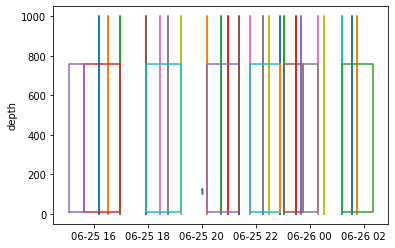

In [34]:
# Plot all regions
r2d.plot(close_region=True)
plt.ylabel('depth')

One can see that most of the regions are either rectangular boxes or vertical log lines.

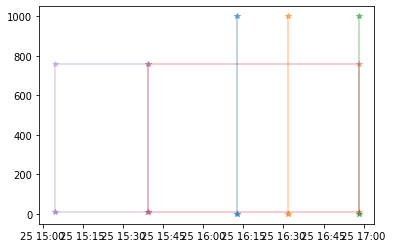

In [35]:
# Plot a subset of regions with options made availible by matplotlib
r2d.plot(r2d[:5], close_region=True, alpha=.3, marker="*", )

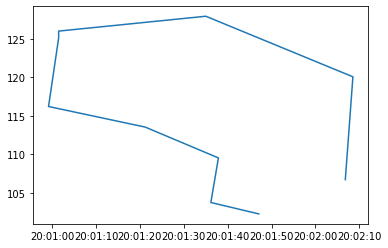

In [36]:
# Plot a region by region ID
r2d.plot(11)

These regions should be closed polygons, but they are provided as a list of points, and matplotlib does not automatically connect the first and last points. Plotting the closed region can be done by specifying `close_region=True` when calling `plot` or by replacing the data with the one returned by `Regions2D.close_region`.

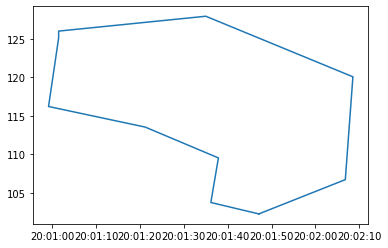

In [37]:
# Plot a closed region without modifying Regions2D.data
r2d.plot(11, close_region=True)

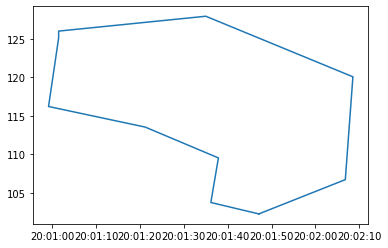

In [38]:
# Plot a closed region without modifying Regions2D.data
r2d.data = r2d.close_region()
r2d.plot(11)

## Subselecting

The powerful indexing capabilities that Pandas provides allows users to filter out the regions that they are interested in.

First let's look at what type of regions this file contains. 

In [39]:
r2d.data['region_class'].unique()

<StringArray>
['Log', 'Side station', 'Off-transect', 'Unknown', 'Unclassified regions']
Length: 5, dtype: string

Since this is the first transect most of the regions are not so interesting. 

In [40]:
# Select by a column value
r2d.data.loc[r2d.data['region_class'] == 'Unknown']

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,region_bbox_calculated,region_bbox_left,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
10,x1,EVRG,7,12.0.341.42620,11,13,10,0,2,-1,1,2017-06-25 20:00:59.180700,2017-06-25 20:02:08.535700,102.255201,127.947603,Unknown,1,Chicken nugget,"[2017-06-25T20:01:47.093000000, 2017-06-25T20:...","[102.2552007996, 103.7403107496, 109.532239554...",[],[]


In [41]:
# Selecting regions using a timestamp 
r2d.data.loc[r2d.data['region_bbox_left'] < '2017-06-25 16:32:00']

,file_name,file_type,evr_file_format_number,echoview_version,region_id,region_structure_version,region_point_count,region_selected,region_creation_type,dummy,region_bbox_calculated,region_bbox_left,region_bbox_right,region_bbox_top,region_bbox_bottom,region_class,region_type,region_name,time,depth,region_notes,region_detection_settings
0,x1,EVRG,7,12.0.341.42620,1,13,4,0,6,-1,1,2017-06-25 16:12:34.333500,2017-06-25 16:12:38.288000,-9999.99,9999.99,Log,2,CTD005,"[2017-06-25T16:12:34.333500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]",[CTD005 at depth],[]
1,x1,EVRG,7,12.0.341.42620,2,13,4,0,6,-1,1,2017-06-25 16:31:36.338500,2017-06-25 16:31:40.211500,-9999.99,9999.99,Log,2,VN001,"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]",[VN001 @ PC1500],[]
3,x1,EVRG,7,12.0.341.42620,4,13,4,0,4,-1,1,2017-06-25 15:39:22.332000,2017-06-25 16:58:09.122500,9.244758,758.973217,Side station,0,Region4,"[2017-06-25T15:39:22.332000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]
4,x1,EVRG,7,12.0.341.42620,5,13,4,0,4,-1,1,2017-06-25 15:04:28.137000,2017-06-25 15:39:26.205000,9.244758,758.973217,Off-transect,0,Region5,"[2017-06-25T15:04:28.137000000, 2017-06-25T15:...","[9.2447583998, 758.9732173069, 758.9732173069,...",[],[]


In [42]:
# Selecting regions with notes with a name containing VN (Vertical Net)
df = r2d.data[r2d.data['region_notes'].astype(bool) & r2d.data['region_name'].str.contains('VN')]
df[['region_name', 'region_notes', 'time', 'depth']]

,region_name,region_notes,time,depth
1,VN001,[VN001 @ PC1500],"[2017-06-25T16:31:36.338500000, 2017-06-25T16:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
7,VN002,[VN002 @ PC1000 in the water],"[2017-06-25T18:45:16.470500000, 2017-06-25T18:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
13,VN003,[Vertical net 003 @ PC500 in the water],"[2017-06-25T20:58:30.235000000, 2017-06-25T20:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
18,VN004,[Vertical net 004 @ PC300 in the water],"[2017-06-25T22:28:24.968500000, 2017-06-25T22:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
24,VN005,[Vertical net 005 in the water @ PC150],"[2017-06-25T23:39:32.741000000, 2017-06-25T23:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
31,VN006,[Vertical net 006 at PC60],"[2017-06-26T01:44:55.408500000, 2017-06-26T01:...","[0.0, 1000.0, 1000.0, 0.0, 0.0]"
